# Chapter 9: Decision Tree

โค้ดตัวอย่างการสร้างโมเดล Decision Tree ในการจำแนกประเภทดอกไอริสจากฟีเจอร์ ตัวอย่างนี้ใช้ชุดข้อมูล [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) โค้ดถูกเขียนโดยใช้ไลบรารี่ [`scikit-learn`](https://scikit-learn.org/)

**Reference**: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

### ขั้นตอน
1. Import Package and Module
2. Load Dataset
3. Train Decision Tree model
4. Discussion

## 1. Import Package and Module

ทำการนำเข้าแพ็กเกจและโมดูลที่จำเป็นต้องใช้อย่าง scikit-learn (sklearn) และ Keras ส่วน Matplotlib ใช้สำหรับแสดงผล

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, datasets
from sklearn.inspection import DecisionBoundaryDisplay

## 2. Load Dataset

ทำการโหลดชุดข้อมูล Iris Dataset ซึ่งประกอบไปด้วยตัวอย่าง 150 ตัวอย่าง จากดอกไอริส 3 ประเภท คือ Setosa, Versicolour, และ Virginica ชนิดละ 50 ตัวอย่าง โดยแต่ละตัวอย่างจะมีฟีเจอร์ 4 อย่างคือ Sepal Length, Sepal Width, Petal Length and Petal Width

โดยในตัวอย่างนี้จะใช้เฉพาะฟีเจอร์ Sepal Length และ Sepal Width เพื่อให้สะดวกต่อการแสดงผลลัพธ์ 

In [2]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target

## 3. Train Decision Tree model

เริ่มต้นจากการกำหนด Hyperparameter ของ [`Decision Tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) เช่น ความสูงสูงสุดของต้นไม้ (max_depth) เป็น 3 แล้วเรียกฟังก์ชัน [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) เพื่อสร้างโมเดล

In [3]:
clf = tree.DecisionTreeClassifier(max_depth=3).fit(X, y)

## 4. Discussion

กราฟแสดง Decision Boundary โดยใช้ [`DecisionBoundaryDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) ของโมเดล Decision Tree โดยพื้นที่แรเงาสีแดง คือ บริเวณที่ทำนายเป็นประเภท Setosa  พื้นที่สีเหลืองเป็นประเภท Versicolour และ พื้นที่สีน้ำเงินเป็นประเภท Virginica แกน x แสดง Sepal Length ส่วนแกน y แสดง Sepal Width 

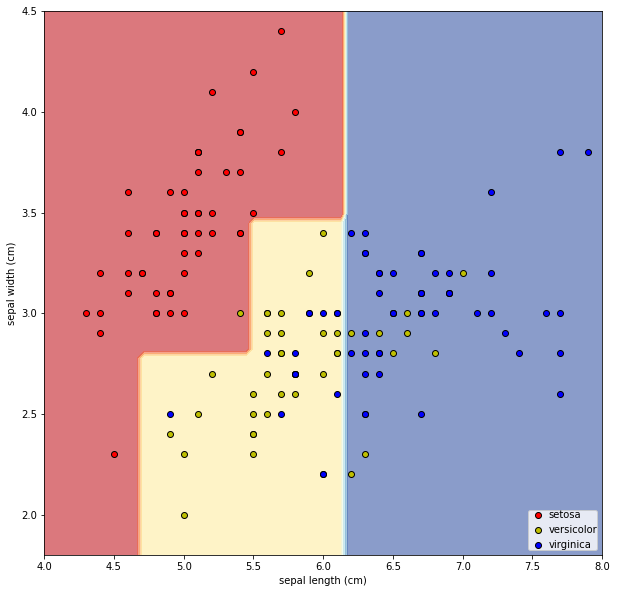

In [4]:
#@title
# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10,10))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    alpha=0.6,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# Plot the training points
for i, color in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor="k")
ax.set_xlim((4,8))
ax.set_ylim((1.8,4.5))
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.show()

## 4. Discussion

กราฟแสดง Decision Tree โดยใช้ฟังก์ชัน [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) โดยสีของโหนดแสดงประเภทส่วนของตัวอย่างในโหนดนั้น ในแต่ละโหนดจะบอก 1) เงื่อนไข 2) ค่า gini index หรือเกณฑ์ที่ใช้  3) จำนวนตัวอย่าง  และ 4) จำนวนตัวอย่างแต่ละประเภท

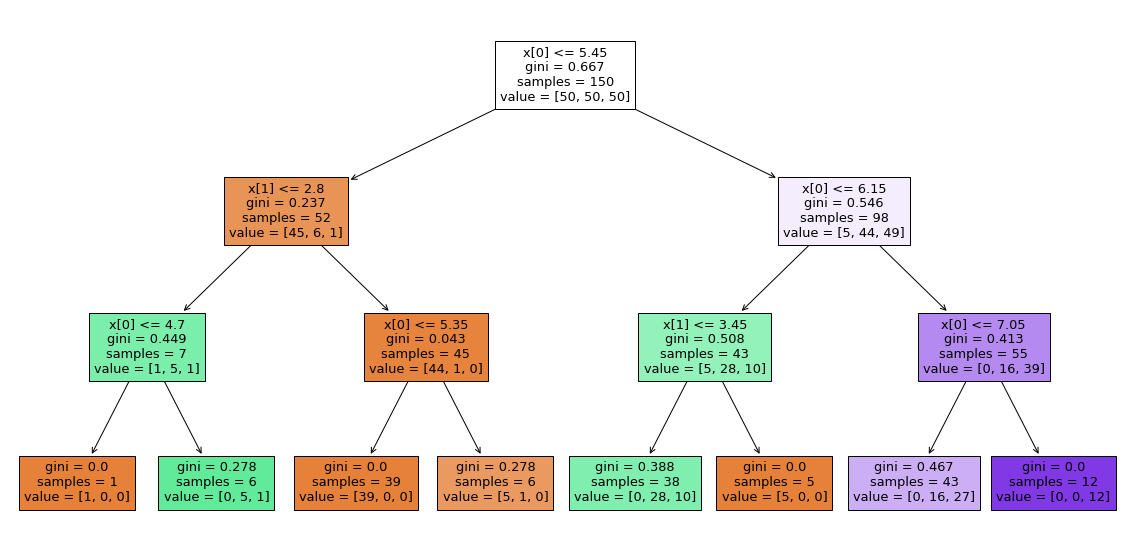

In [5]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
plt.show()

----